# DIABETES PREDICTION SYSTEM

#### Internship By: MERISKILL
**Data Analyst:** Pratyakshkumar Parmar

### OBJECTIVE: 
#### To Predict whether a Patient has Diabetes based on certain diagnostic measurements included in the dataset.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df =pd.read_csv("diabetes.csv")

### Features Description

**Pregnancies**: No. times pregnant<br>
**Glucose**:Plasma glucose concentration a 2 hours in a glucose tolerance test<br>
**BloodPressure**:Diastolic blood pressure(mm) Hg)<br>
**skinThickness**:Triceps skin fold thickness(mm)<br>
**Insulin**: 2 hour serum insulin (mu U/ml)<br>
**BMI**:Body mass index(weight in KG/ (Height in m)^2)<br>
**DiabetesPedigreeFunction**: Diabetes Pedigree function<br>
**Age**: Age in years<br><br>
**Outcome**: Result **Yes if "1" or No if "0"**

In [3]:
# Cheking random 10 entries

df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
305,2,120,76,37,105,39.7,0.215,29,0
5,5,116,74,0,0,25.6,0.201,30,0
81,2,74,0,0,0,0.0,0.102,22,0
655,2,155,52,27,540,38.7,0.240,25,1
196,1,105,58,0,0,24.3,0.187,21,0
329,6,105,70,32,68,30.8,0.122,37,0
594,6,123,72,45,230,33.6,0.733,34,0
97,1,71,48,18,76,20.4,0.323,22,0
218,5,85,74,22,0,29.0,1.224,32,1
396,3,96,56,34,115,24.7,0.944,39,0


In [4]:
# Checking number of Rows and Columns

df.shape

(768, 9)

In [5]:
# Checking basic info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# checking missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking Basic stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Finding insights aboutIndependent Features with Dependent(Outcome)

df.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


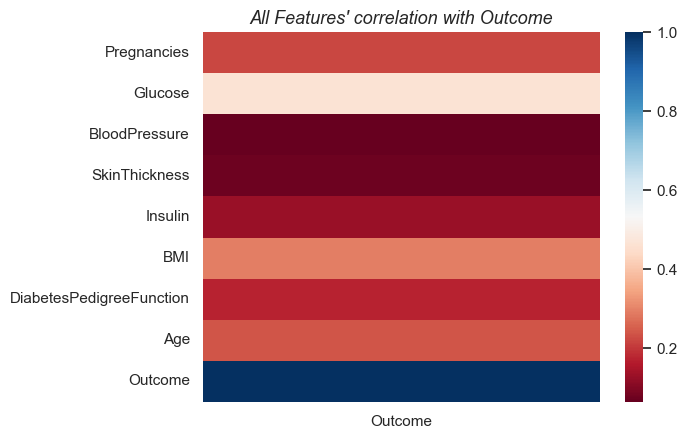

In [30]:
# Let's check correlation using heatmap with Dependent Feature i.e. "Outcome"

plt.title("All Features' correlation with Outcome",fontsize=13,fontstyle='italic')
sns.heatmap(df.corr()[['Outcome']],cmap='RdBu')
plt.show()

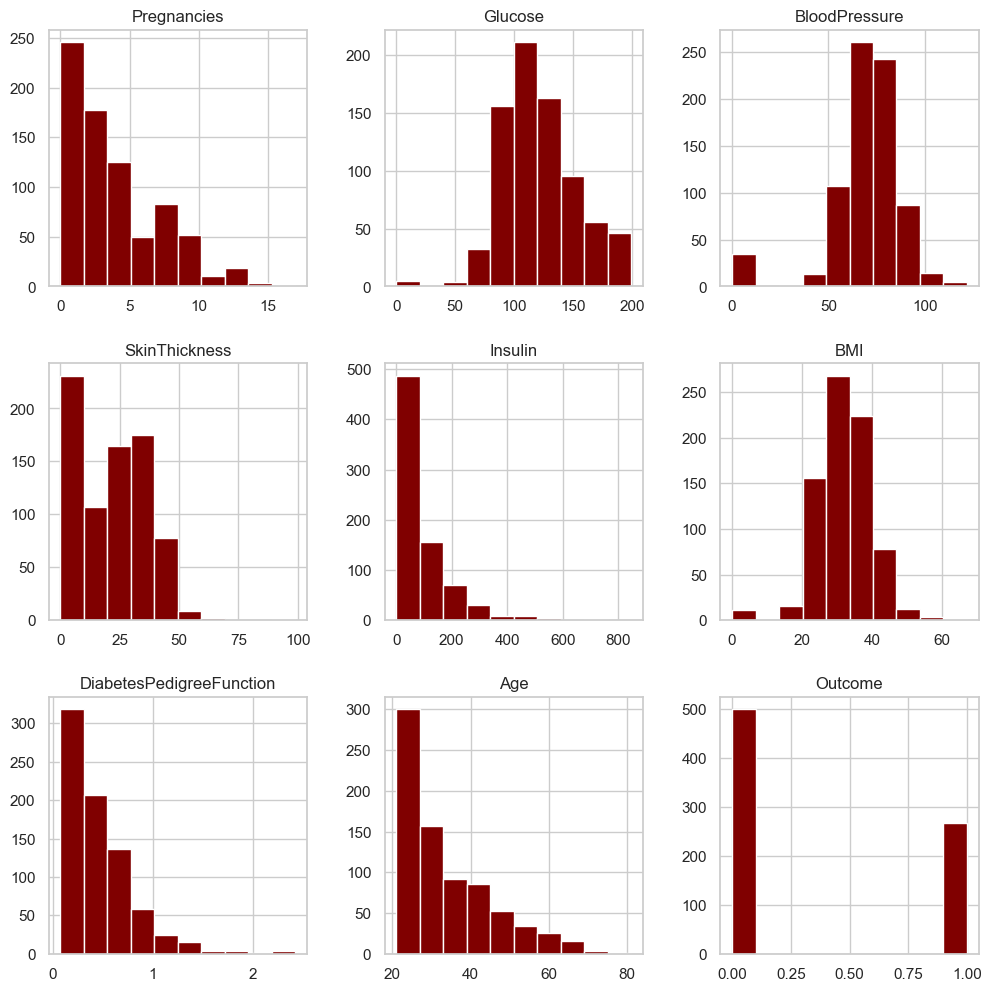

In [31]:
# Checking Histplot

df.hist(figsize=(12,12),color='Maroon')
plt.show()

C:\Users\PRATYAKSH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


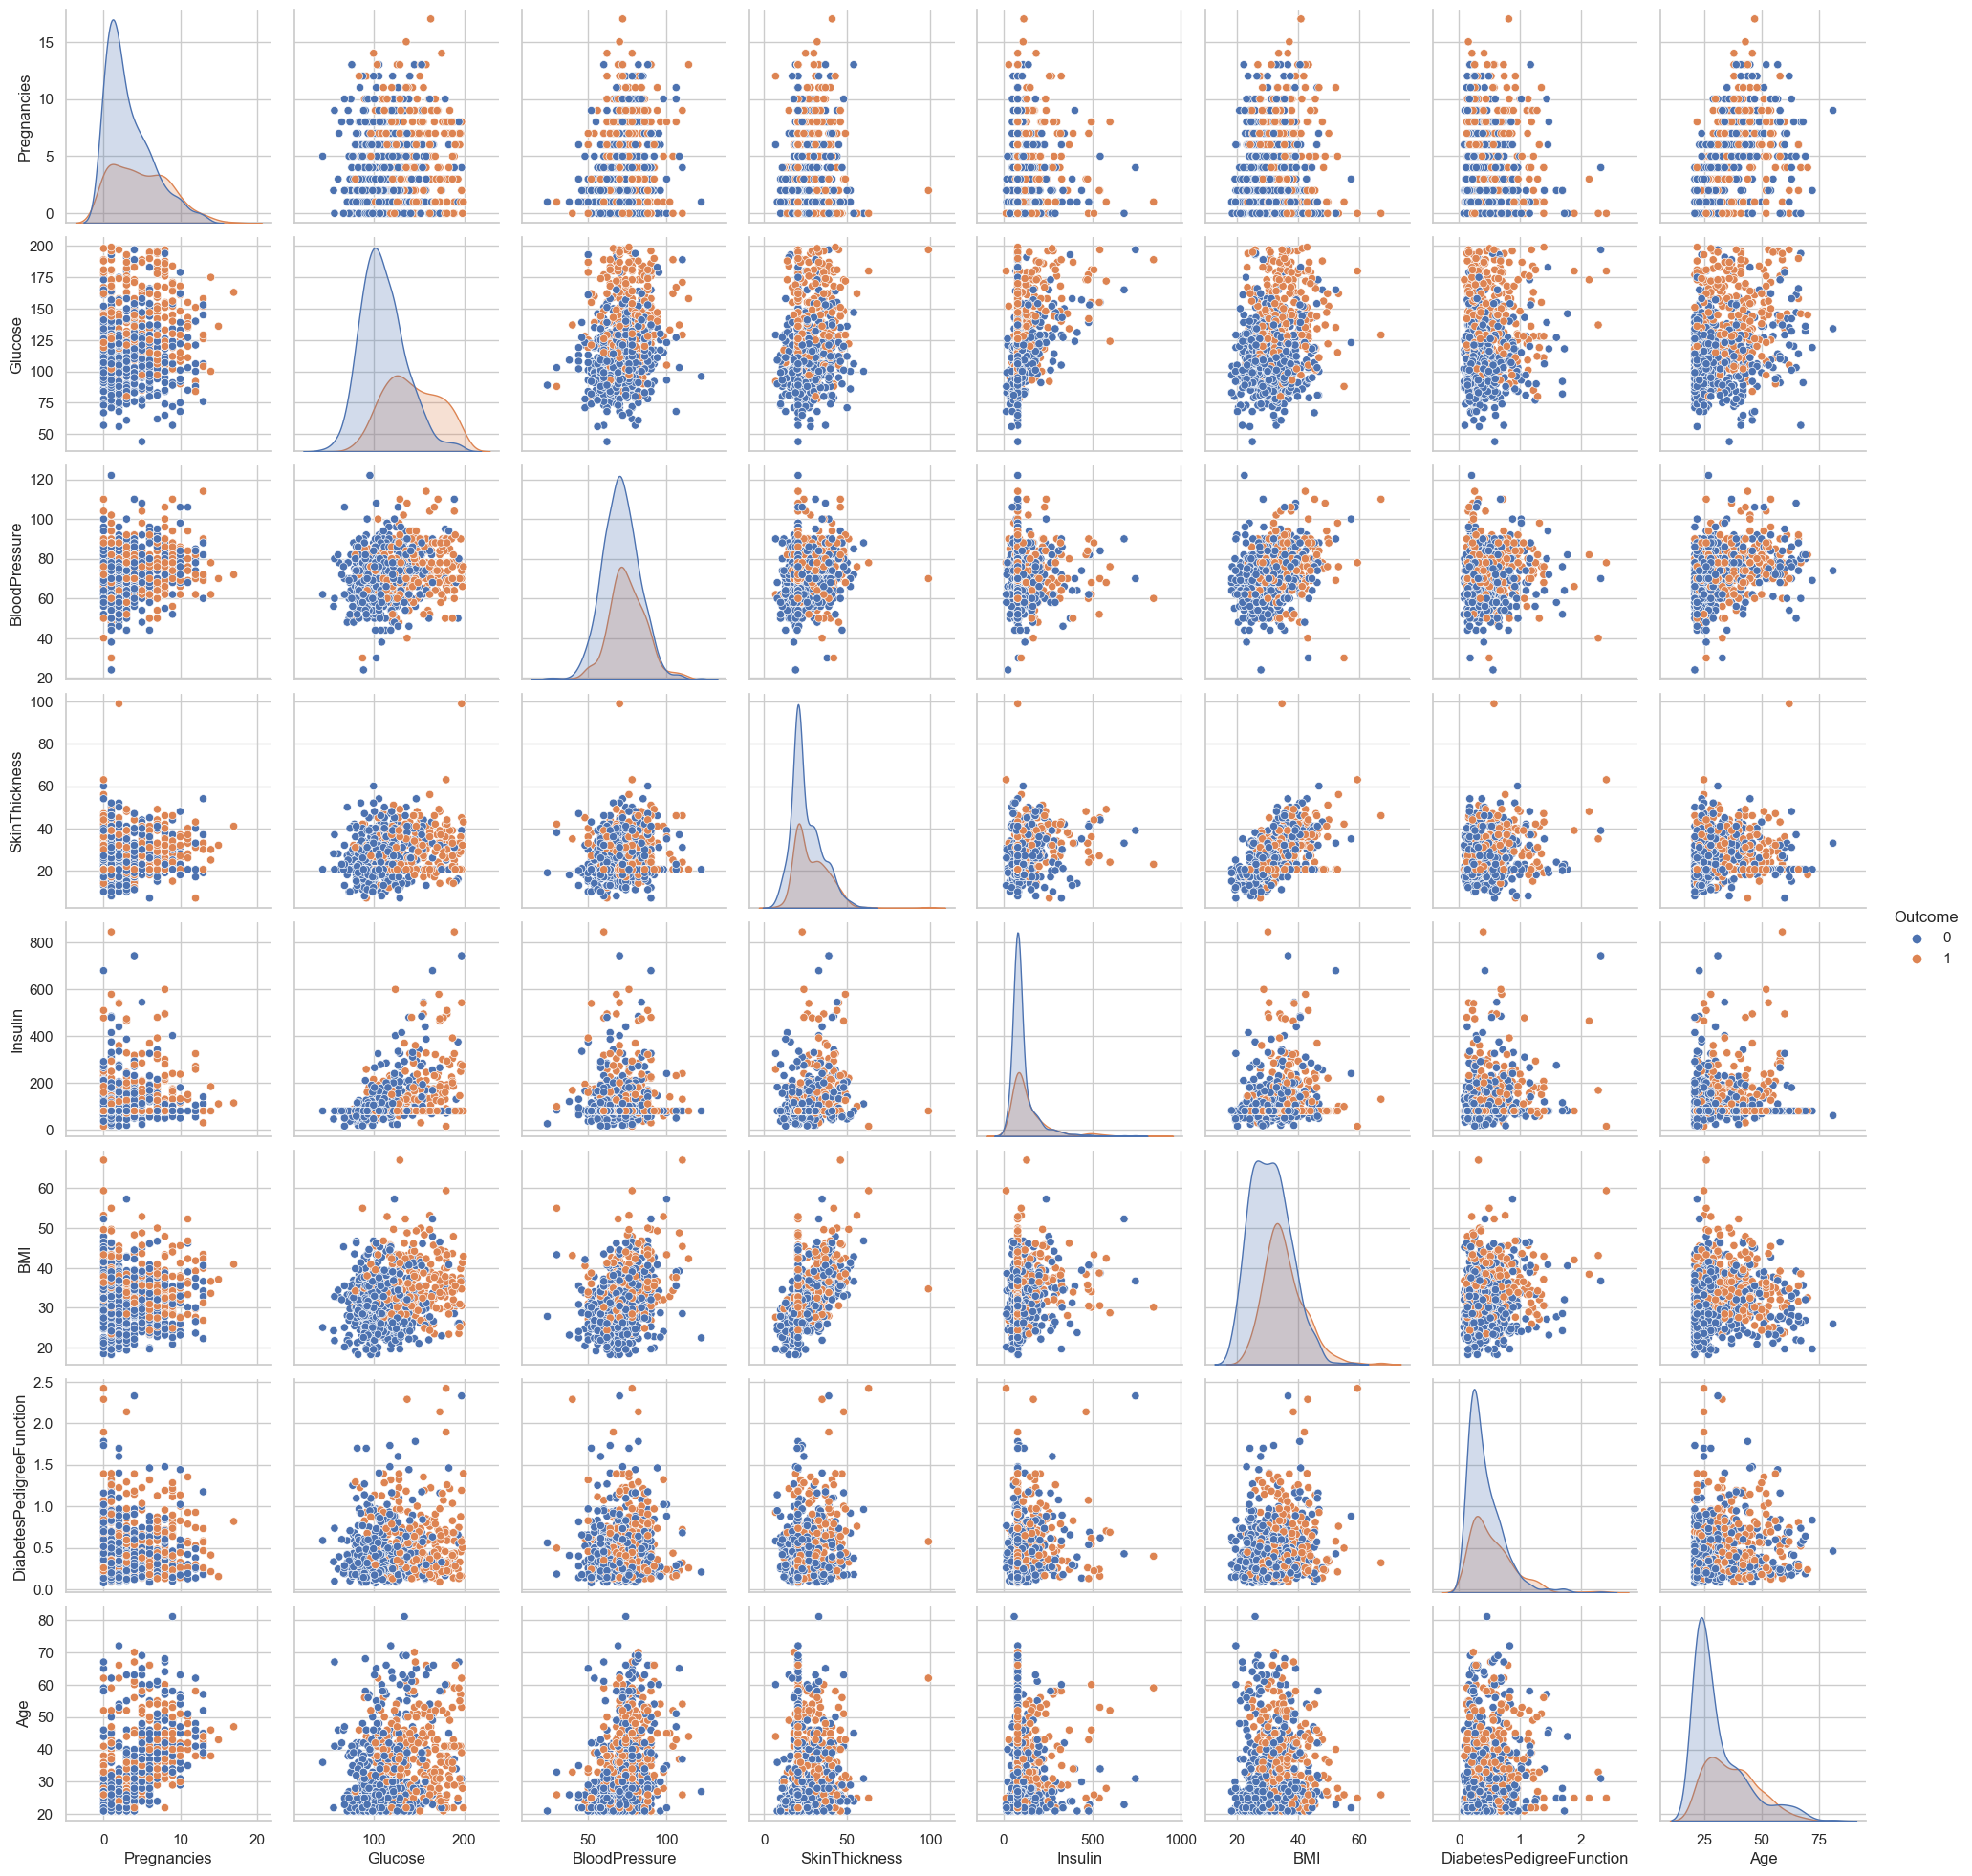

In [32]:
sns.pairplot(new_df,hue="Outcome")
plt.show()

In [11]:
print("Minimum Values in Columns:\n")

for i in df.columns:
    x=df[i].min()
    print(i,x)

Minimum Values in Columns:

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0.0
DiabetesPedigreeFunction 0.078
Age 21
Outcome 0


#### Here, we can observe that 0 in certain columns does not make sense in real time. So,we will chnage that 0 with average value<br>
#### 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [12]:
Glu = df.Glucose.mean()
Bld =df.BloodPressure.mean()
Ski =df.SkinThickness.mean()
Ins = df.Insulin.mean()
Bmi = df.BMI.mean()

print(f"Average of Glucose is: {Glu}")
print(f"Average of BloodPressure is: {Bld}")
print(f"Average of SkinThickness is: {Ski}")
print(f"Average of Insulin is: {Ins}")
print(f"Average of BMI is: {Bmi}")

Average of Glucose is: 120.89453125
Average of BloodPressure is: 69.10546875
Average of SkinThickness is: 20.536458333333332
Average of Insulin is: 79.79947916666667
Average of BMI is: 31.992578124999998


### Let's make new dataframe and then modify as per requirements.

In [13]:
new_df =df.copy()

In [14]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### We will now chnage 0 with average value in respective columns. 

In [15]:
new_df['Glucose']= new_df['Glucose'].replace(0,Glu)
new_df['BloodPressure']= new_df['BloodPressure'].replace(0,Bld)
new_df['SkinThickness']= new_df['SkinThickness'].replace(0,Ski)
new_df['Insulin']= new_df['Insulin'].replace(0,Ins)
new_df['BMI']= new_df['BMI'].replace(0.00,Bmi)

In [16]:
for i in new_df.columns[1:6]:
    x=new_df[i].min()
    print(i,x)

Glucose 44.0
BloodPressure 24.0
SkinThickness 7.0
Insulin 14.0
BMI 18.2


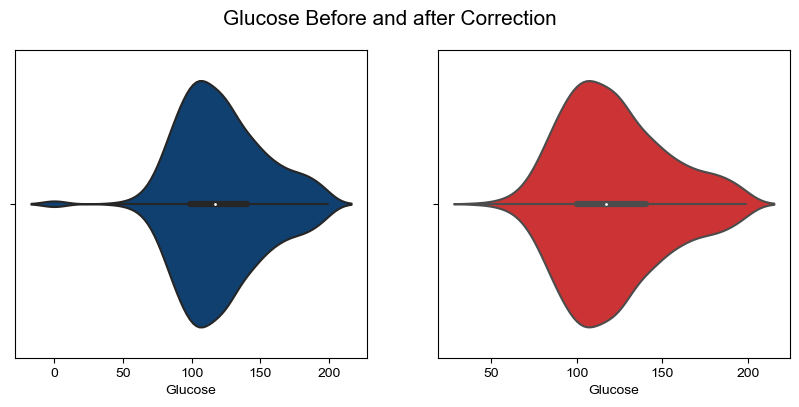

In [17]:
fig,axes = plt.subplots(1,2,figsize=(10,4),squeeze=False)
plt.suptitle("Glucose Before and after Correction",fontsize=15)

sns.set(style='whitegrid')

sns.violinplot(ax = axes[0,0], x=df.Glucose, data=df,palette='ocean')
sns.violinplot(ax = axes[0,1], x=new_df.Glucose, data=new_df,palette='Set1')

plt.show()


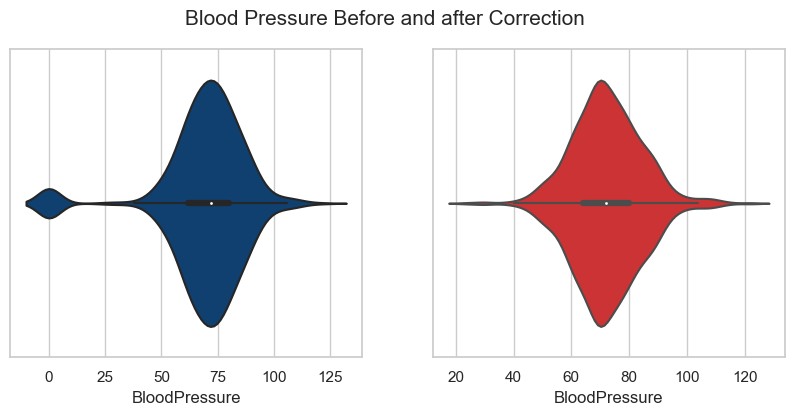

In [18]:
fig,axes = plt.subplots(1,2,figsize=(10,4),squeeze=False)
plt.suptitle("Blood Pressure Before and after Correction",fontsize=15)
sns.set(style='whitegrid')

sns.violinplot(ax = axes[0,0], x=df.BloodPressure, data=df,palette='ocean')
sns.violinplot(ax = axes[0,1], x=new_df.BloodPressure, data=new_df,palette='Set1')

plt.show()

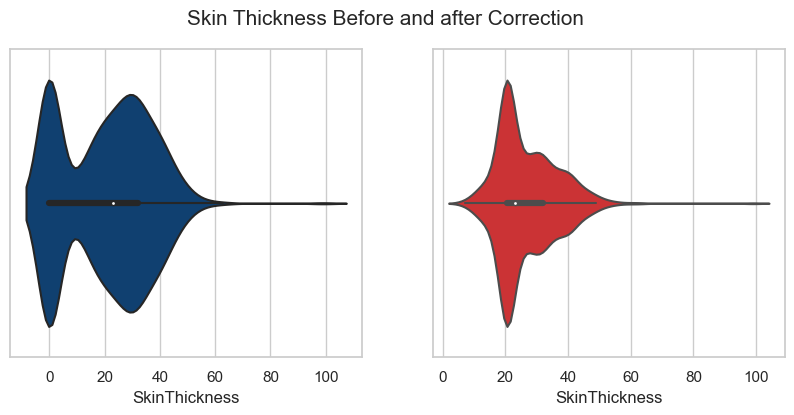

In [19]:
fig,axes = plt.subplots(1,2,figsize=(10,4),squeeze=False)
plt.suptitle("Skin Thickness Before and after Correction",fontsize=15)

sns.set(style='whitegrid')

sns.violinplot(ax = axes[0,0], x=df.SkinThickness, data=df,palette='ocean')
sns.violinplot(ax = axes[0,1], x=new_df.SkinThickness, data=new_df,palette='Set1')

plt.show()

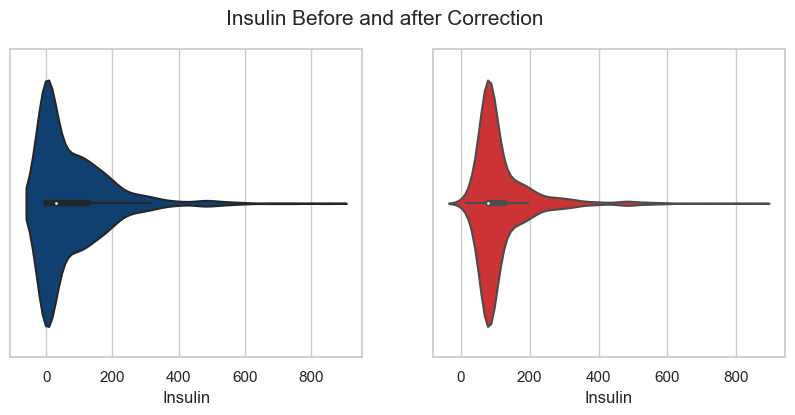

In [20]:
fig,axes = plt.subplots(1,2,figsize=(10,4),squeeze=False)
plt.suptitle("Insulin Before and after Correction",fontsize=15)

sns.set(style='whitegrid')

sns.violinplot(ax = axes[0,0], x=df.Insulin, data=df,palette='ocean')
sns.violinplot(ax = axes[0,1], x=new_df.Insulin, data=new_df,palette='Set1')

plt.show()

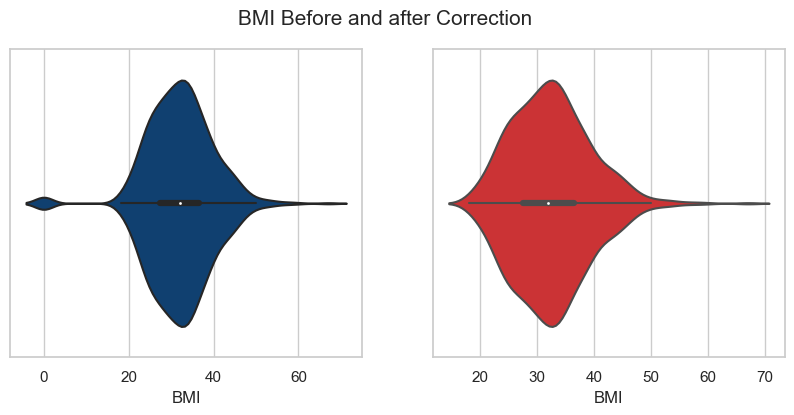

In [21]:
fig,axes = plt.subplots(1,2,figsize=(10,4),squeeze=False)
plt.suptitle("BMI Before and after Correction",fontsize=15)

sns.set(style='whitegrid')

sns.violinplot(ax = axes[0,0], x=df.BMI, data=df,palette='ocean')
sns.violinplot(ax = axes[0,1], x=new_df.BMI, data=new_df,palette='Set1')

plt.show()

### Let's work on Machine learning model to Predict Outcome

In [22]:
# Features selection 

X = new_df.drop('Outcome',axis=1)
y = new_df['Outcome']

In [23]:
# To split data into train and test 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
# Using Logistic Regression model

from sklearn.linear_model import LogisticRegression  

model =LogisticRegression()
model.fit(X_train,y_train)

C:\Users\PRATYAKSH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
prediction = model.predict(X_test)

In [26]:
print(prediction)

[0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0]


In [27]:
# Checking accuracy of the model

from sklearn.metrics import accuracy_score 

accuracy = accuracy_score(prediction,y_test)
print(f"Accuracy of the model is: {accuracy*100}")

Accuracy of the model is: 80.51948051948052
